# Dragon Real estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()# can help see missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline          
import matplotlib.pyplot as plt

In [8]:
#housing.hist(bins=50,figsize=(20,15))
#plt.show()

# Train/Test spliting


In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    #print(shuffle)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffle[:test_set_size]
    train_indices=shuffle[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
#but if we will use np.random.permutation again and again it will go through the whole dataset and we dont want out training set
#set to go through the test set
# not good f0r long run, so we will set seed
#this is already written in sklearn.model_selection

In [10]:
#train_set,test_set=split_train_test(housing,0.2)

In [11]:
#print(f"rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")


In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing, test_size=0.2,random_state=42)
print(f"rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")


rows in train set: 404 
Rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    start_test_set=housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
housing=strat_train_set.copy()

# looking for corelations


In [16]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
#pearson correlation 

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F5033D788>,
      dtype=object)

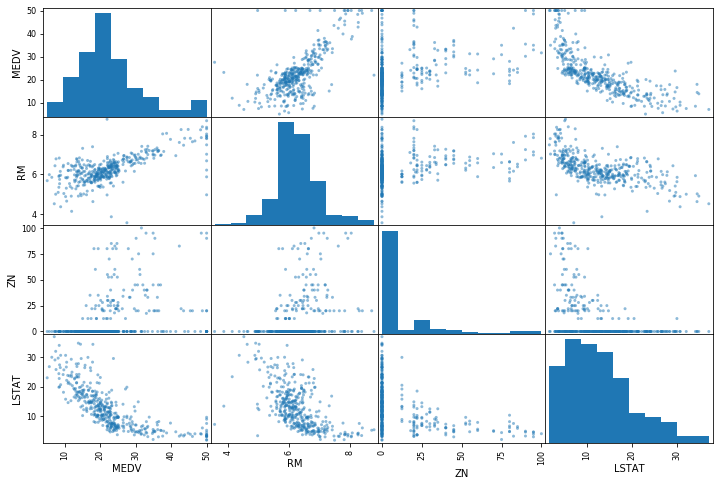

In [18]:
attribute=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attribute], figsize=(12,8))

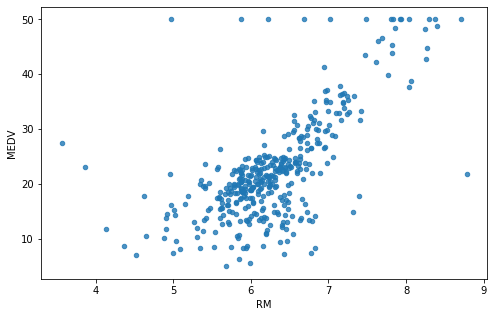

In [19]:
housing.plot(kind="scatter", x='RM', y='MEDV',figsize=(8,5), alpha=0.8)

# trying out Attribute Combination

In [20]:
#tax per room
housing["TAXR"]=housing['TAX']/housing['RM']

In [21]:
housing['TAXR']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXR, Length: 404, dtype: float64

In [22]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXR      -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

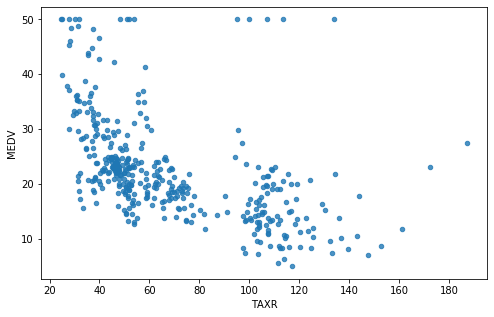

In [23]:
housing.plot(kind="scatter", x='TAXR', y='MEDV',figsize=(8,5), alpha=0.8)

In [24]:
median=housing['RM'].median

In [25]:
housing= strat_train_set.drop('MEDV', axis=1)
housing_labels= strat_train_set[["MEDV"]].copy()

# for missing values sklearn already has a function names IMPUTER

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [27]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [28]:
x= imputer.transform(housing)

In [29]:
housing_tr=pd.DataFrame(x, columns=housing.columns)

In [30]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# creating pipeline


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("std_scaller", StandardScaler())
])

In [32]:
#it will create a numpy array

housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr.shape

(404, 13)

# Model Selection

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

C:\Users\alice\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
some_data=housing.iloc[:5]

In [35]:
some_labels=housing_labels.iloc[:5]

In [36]:
prepared_data=my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.472, 25.464, 16.454, 23.302, 23.63 ])

In [38]:
some_labels

,MEDV
254,21.9
348,24.5
476,16.7
321,23.1
326,23.0


# evaluating our model


In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(mse)

In [40]:
#for linear model
#lin_mse
# its very large error
# we can not use this model

In [41]:
mse  # its over fitting with decision tree

1.5235408415841567

# using cross validation


In [42]:

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

In [43]:
#decision tree
rmse_scores

array([2.84384981, 2.82352232, 4.34953328, 2.45800119, 3.35341149,
       2.72991827, 5.02052107, 3.31026513, 3.29445317, 3.3221686 ])

In [44]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation",scores.std())
    

In [45]:
print_scores(rmse_scores)

scores: [2.84384981 2.82352232 4.34953328 2.45800119 3.35341149 2.72991827
 5.02052107 3.31026513 3.29445317 3.3221686 ]
Mean: 3.3505644342699403
Standard Deviation 0.7422051451836341


we will choose random forest regressor :)
## saving model

In [46]:
from joblib import dump,load
dump(model,"Dragon.joblib")

['Dragon.joblib']

# testing the model

In [49]:
x_test=start_test_set.drop("MEDV", axis=1)
y_test=start_test_set['MEDV'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)


In [50]:
final_rmse

2.9966041826459118

In [51]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# using the model 

In [53]:
from joblib import dump,load
model=load('Dragon.joblib')
import numpy as np
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.472])